In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [38]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train['index']='train'
test['index']='test'
data = pd.concat([train, test],ignore_index=True)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,index
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


#### By looking at the data we can hypothesise that 'item_type',Item_Visibility,Item MRP,outlet_size,outlet_location_type outlet_size_outlet_type will have good impact on sales prediction


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  index                      14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [4]:
# find out categorical columns and numerical columns 
def data_type(data,col,max_cat):
    if((data[col].dtype=='O') | (data[col].nunique()<max_cat)):
        return 'categorical'
    else:
        return 'numerical'
column={col:data_type(data,col,9) for col in data.columns} 
pd.Series(column)

Item_Identifier              categorical
Item_Weight                    numerical
Item_Fat_Content             categorical
Item_Visibility                numerical
Item_Type                    categorical
Item_MRP                       numerical
Outlet_Identifier            categorical
Outlet_Establishment_Year      numerical
Outlet_Size                  categorical
Outlet_Location_Type         categorical
Outlet_Type                  categorical
Item_Outlet_Sales              numerical
index                        categorical
dtype: object

#### We see that we have four numerical columns and rest are categorical

In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


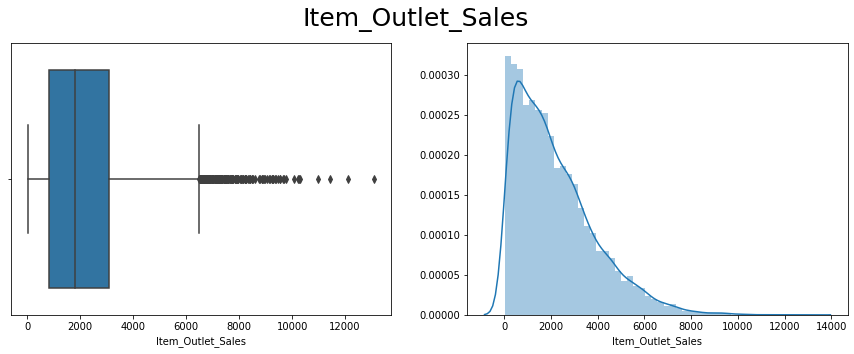

In [6]:
plt.figure(figsize=(15,5))
plt.suptitle('Item_Outlet_Sales',fontsize=25)
plt.subplot(121)
sns.boxplot(data.Item_Outlet_Sales)
plt.subplot(122)
sns.distplot(data.Item_Outlet_Sales)

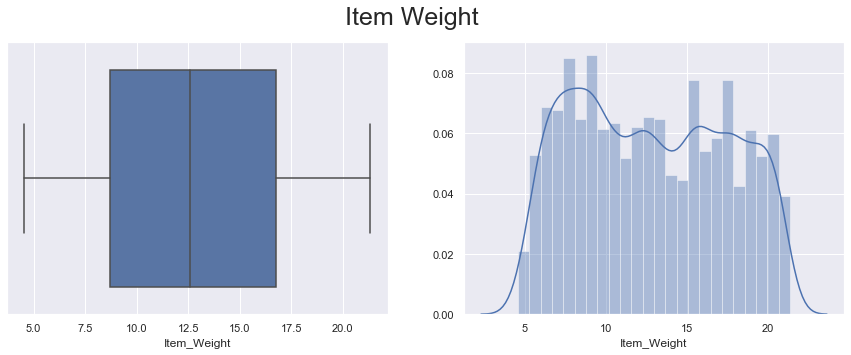

In [7]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
plt.suptitle('Item Weight',fontsize=25)
plt.subplot(121)
sns.boxplot(data.Item_Weight)
plt.subplot(122)
sns.distplot(data.Item_Weight)

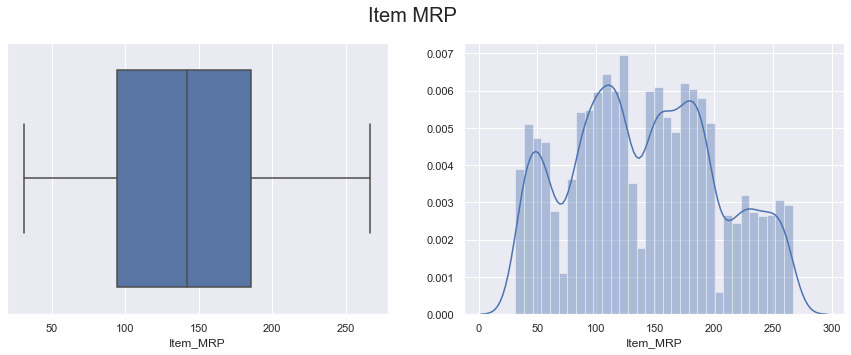

In [8]:
plt.figure(figsize=(15,5))
plt.suptitle('Item MRP',fontsize=20)
plt.subplot(121)
sns.boxplot(data.Item_MRP)
plt.subplot(122)
sns.distplot(data.Item_MRP)

#### It is evident from the above boxplots that Item_MRP and Item_Weight have no outliers

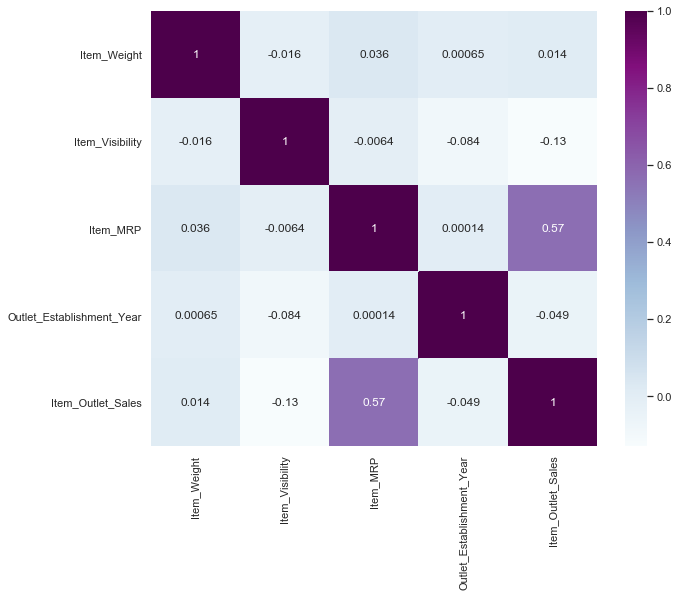

In [9]:
#now let's check for correlation among numerical variable
numeric=data.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(),cmap='BuPu',annot=True)

#### From above correlation plot we see that Item_MRP is the most correlated to Item_outlet_sales
#### Item visibility is negatively correlated to Item_outlet_sales which contradicts our hypothesis that item visibility will have good impact(i.e. more visibility more sales) on Item_outlet_sales.It's negatively correlated with MRP so, less visible the product is in the store the higher the price will be

## Categorical Features

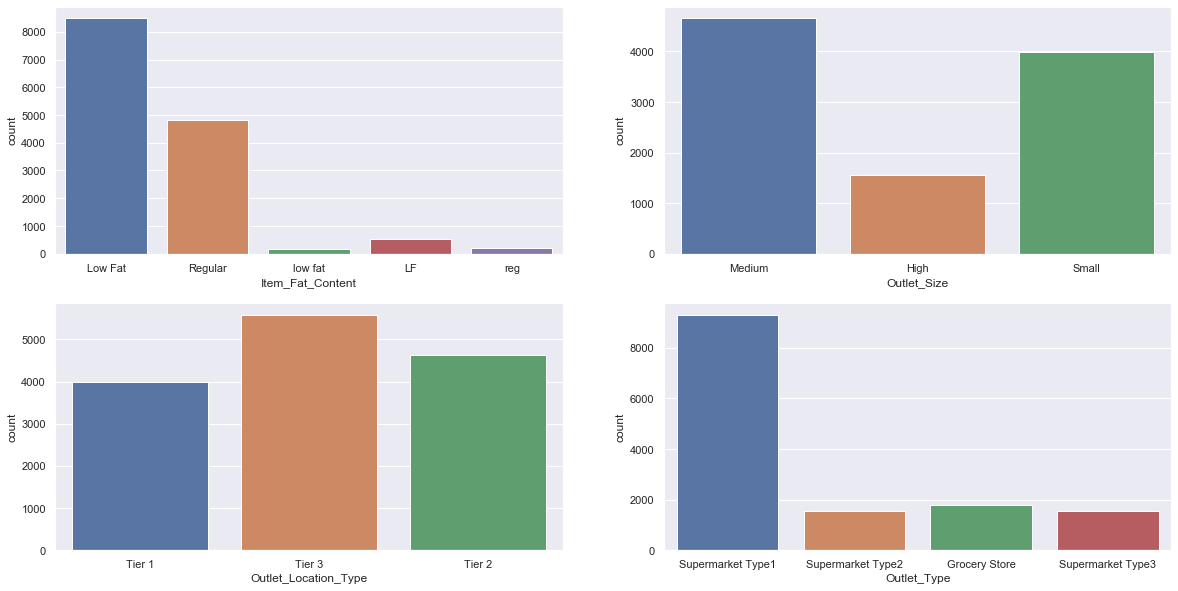

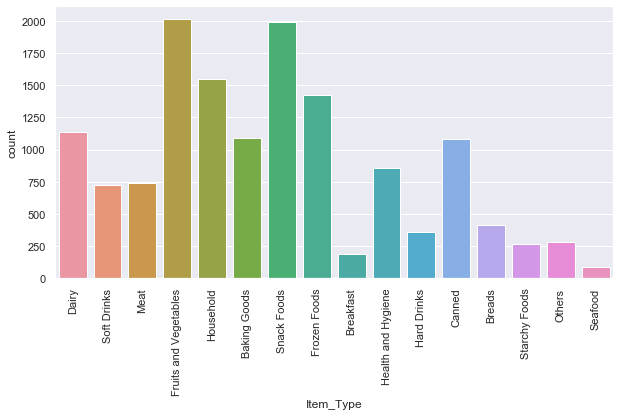

In [10]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
sns.countplot(data.Item_Fat_Content,ax=ax[0][0])
sns.countplot(data.Outlet_Size,ax=ax[0][1])
sns.countplot(data.Outlet_Location_Type,ax=ax[1][0])
sns.countplot(data.Outlet_Type,ax=ax[1][1])
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(data.Item_Type)

#### Fruits and vegetable item_type is most common followed by snacks food. Most of food items have low fat content. Low fat is written in three different ways(Low Fat,LF,low fat) which needs to be rectified.Like low fat regular is written in twodifferent ways. 

## Bivariate Analysis

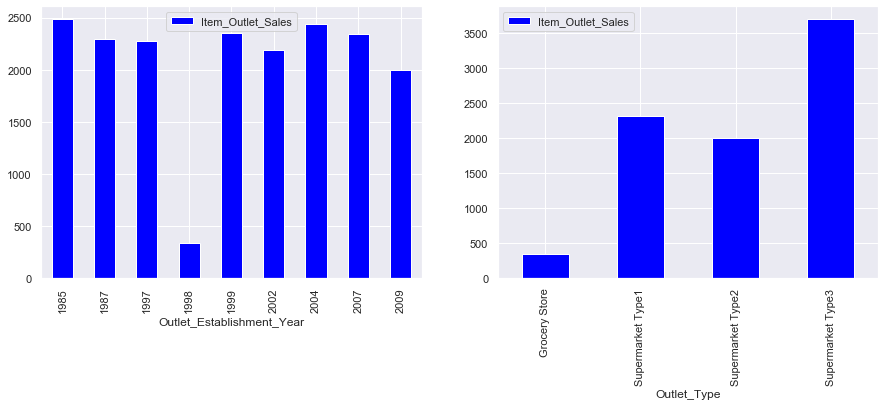

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
data.pivot_table(index='Outlet_Establishment_Year',values='Item_Outlet_Sales',aggfunc='mean').plot(kind='bar',ax=ax1,color='blue')
data.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc='mean').plot(kind='bar',ax=ax2,color='blue')


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

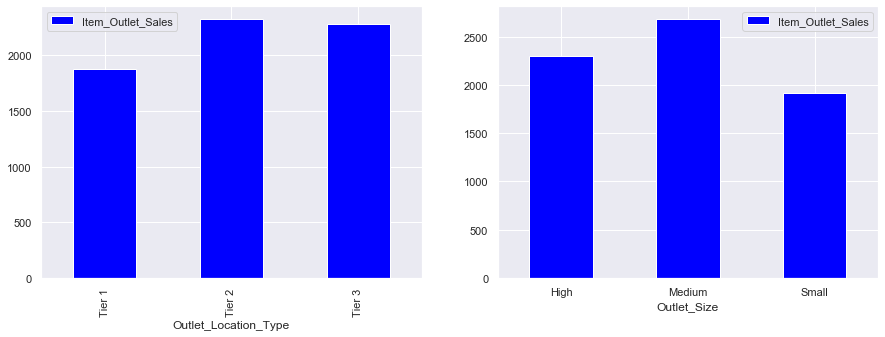

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
data.pivot_table(index='Outlet_Location_Type',values='Item_Outlet_Sales',aggfunc='mean').plot(kind='bar',ax=ax1,color='blue')
data.pivot_table(index='Outlet_Size',values='Item_Outlet_Sales',aggfunc='mean').plot(kind='bar',ax=ax2,color='blue')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

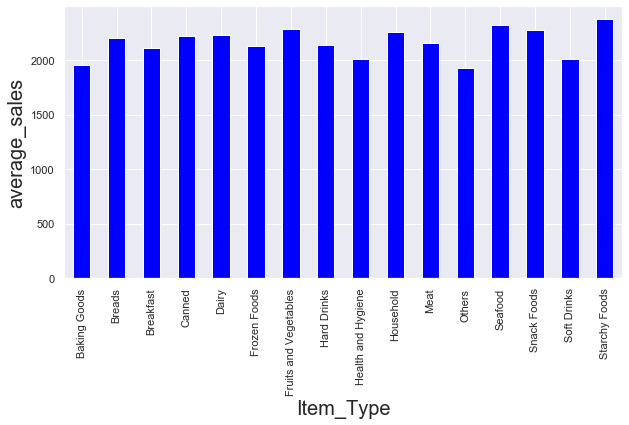

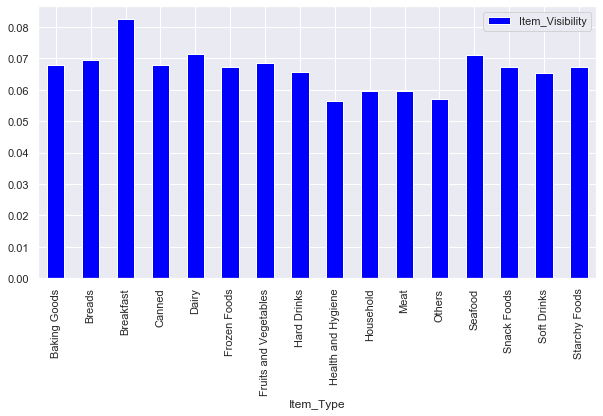

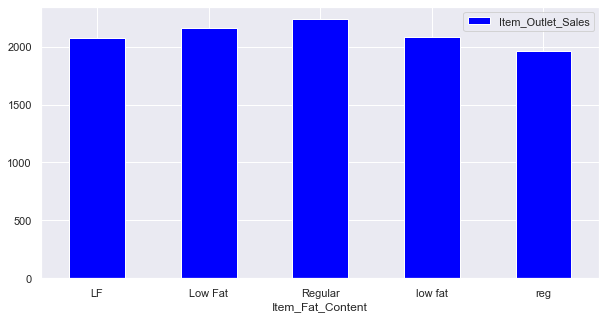

In [13]:
ItemType=data.groupby('Item_Type').mean()['Item_Outlet_Sales']
ItemType.plot(kind='bar',figsize=(10,5),color='blue').set_xlabel('Item_Type',fontsize=20)
plt.ylabel('average_sales',fontsize=20)
data.pivot_table(index='Item_Type',values='Item_Visibility').plot(kind='bar',figsize=(10,5),color='blue')
data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales').plot(kind='bar',figsize=(10,5),color='blue')
plt.xticks(rotation=0)

#### Low fat items tends to sale more. Tier 2 and Tier 3 have more sales.At first we thought that big size store would have more sales but the plot above shows that medium and small store have more sales.Also,there are no big variation in sales due to Item_Type


## Missing Values

In [39]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
index                           0
dtype: int64

#### Two columns have missing data.I need to impute them

In [40]:
item_avg_weight=data.pivot_table(index='Item_Identifier',values='Item_Weight',aggfunc='mean')
item_avg_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [41]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight 
print('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [43]:
data['Item_Weight'].value_counts()

10.500    147
17.600    135
12.150    128
17.750    123
16.700    122
         ... 
7.850       1
8.800       1
7.090       1
6.575       1
5.920       1
Name: Item_Weight, Length: 628, dtype: int64

#### We have imputed all missing values in Item_Weight column both in train and test data

In [44]:
from scipy.stats import mode
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print( '\nOrignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
0


In [45]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
index                           0
dtype: int64

#### As we can see above ,we have imputed both Item_Weight and Outlet_Size columns in train and test data as well. We noticed during data visualization that Item_Visibility had zero values which don't make sense. So, will consider them as Nan an impute them accordingly with their Item_type

In [46]:
visibility_item_avg=data.pivot_table(values='Item_Visibility',index='Item_Identifier')
visibility_item_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [48]:
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


### Modifying outlet_establishment_year

In [49]:
data['Outlet_#Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_#Years'].describe()
# changed it to how old a store is taking 2013 as refrence

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_#Years, dtype: float64

### creating a new variable using Item Identifier

In [50]:
data['Item_Type_broad'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_broad'] = data['Item_Type_broad'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_broad'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_broad, dtype: int64

In [51]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
print (data['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [52]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,index,Outlet_#Years,Item_Type_broad
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14,Food
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,15,Food
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,16,Food
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,4,Food
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,test,11,Non-Consumable
14202,FDJ26,15.30,Regular,0.088380,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,test,6,Food


In [53]:
from sklearn.preprocessing import LabelEncoder 
data['Outlet'] = LabelEncoder().fit_transform(data['Outlet_Identifier'])

In [54]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_broad','Outlet'])

In [55]:
data.dtypes

Item_Identifier                    object
Item_Weight                       float64
Item_Visibility                   float64
Item_Type                          object
Item_MRP                          float64
Outlet_Identifier                  object
Outlet_Establishment_Year           int64
Item_Outlet_Sales                 float64
index                              object
Outlet_#Years                       int64
Item_Fat_Content_Low Fat            uint8
Item_Fat_Content_Regular            uint8
Outlet_Location_Type_Tier 1         uint8
Outlet_Location_Type_Tier 2         uint8
Outlet_Location_Type_Tier 3         uint8
Outlet_Size_High                    uint8
Outlet_Size_Medium                  uint8
Outlet_Size_Small                   uint8
Outlet_Type_Grocery Store           uint8
Outlet_Type_Supermarket Type1       uint8
Outlet_Type_Supermarket Type2       uint8
Outlet_Type_Supermarket Type3       uint8
Item_Type_broad_Drinks              uint8
Item_Type_broad_Food              

In [56]:
data=data.drop(['Item_Type','Item_Identifier','Outlet_Identifier','Item_Identifier','Outlet_Establishment_Year'],axis=1)

#Divide into test and train:
train = data.loc[data['index']=="train"]
test = data.loc[data['index']=="test"]

#Drop unnecessary columns:
test=test.drop(['index','Item_Outlet_Sales'],axis=1)
train=train.drop(['index'],axis=1)


In [57]:
train.columns,test.columns

(Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
        'Outlet_#Years', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
        'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
        'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium',
        'Outlet_Size_Small', 'Outlet_Type_Grocery Store',
        'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
        'Outlet_Type_Supermarket Type3', 'Item_Type_broad_Drinks',
        'Item_Type_broad_Food', 'Item_Type_broad_Non-Consumable', 'Outlet_0',
        'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6',
        'Outlet_7', 'Outlet_8', 'Outlet_9'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_#Years',
        'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
        'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
        'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Ou

In [58]:
X=train.drop(['Item_Outlet_Sales'],axis=1)
Y=train['Item_Outlet_Sales']

In [63]:
X
# We have complete our data cleaning part for train and test data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_#Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.300,0.016047,249.8092,14,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,4,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,14,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.017834,182.0950,15,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.009780,53.8614,26,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,26,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,11,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,9,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,4,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## Modelling 

In [64]:
submission=pd.read_csv('sample_submission_8RXa3c6.csv')
def grid_search(model,x,y,param):
    res=GridSearchCV(model,param,scoring='neg_mean_squared_error').fit(x,y)
    return res.best_score_,res.best_params

def model_fit(model,x,y,test,filename):

    model.fit(x,y)
    cv=cross_val_score(model,x,y,scoring='neg_mean_squared_error')
    cv=np.sqrt(np.abs(cv))
    print('mean_cv_score:',cv.mean(),'  | ','max_cv_score:',cv.max(),'  | ','min_cv_score:',cv.min())
    y_pred=model.predict(test)
    print(y_pred.min())
    submission['Item_Outlet_Sales']=y_pred
    submission.to_csv(filename,index=False)
    

### Linear Regression

mean_cv_score: 1129.8810551438175   |  max_cv_score: 1150.8913003767987   |  min_cv_score: 1113.0951724934407
-1362.9619708840455


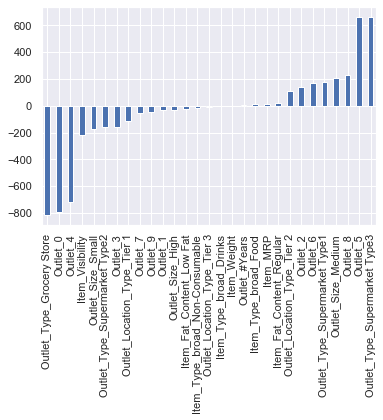

In [65]:
model=LinearRegression(normalize=True)
model_fit(model,X,Y,test,'lin_reg.csv')
#model.fit(X,Y)
coef=pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar')

### Ridge Regression

mean_cv_score: 1250.375543667862   |  max_cv_score: 1295.221946996146   |  min_cv_score: 1207.199231501892
-174.86240275177056


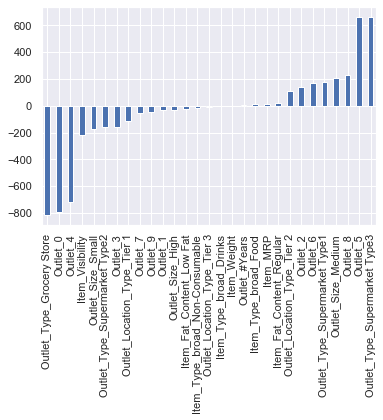

In [66]:
model1=Ridge(normalize=True)
model_fit(model1,X,Y,test,'ridge_reg.csv')
#model.fit(X,Y)
coef1=pd.Series(model.coef_,X.columns).sort_values()
coef1.plot(kind='bar')

### Random Forest Regressor

In [80]:
rf=RandomForestRegressor(random_state=0)
model_fit(rf,X,Y,test,'rf_reg.csv')

mean_cv_score: 1138.9170343758174   |  max_cv_score: 1152.5695871978699   |  min_cv_score: 1126.8203997967469
55.07497600000001


### Hyperparameter Tuning for Random Forest

In [81]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,50,100,200,500],'max_depth':[2,4,10,15],'min_samples_split':[2,5,8,10]}
gs=GridSearchCV(rf,param_grid=params,n_jobs=-1,cv=5)
gs.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [84]:
gs.best_params_,gs.best_score_

({'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500},
 0.5878839897779681)

#### We got best parameters above

In [87]:
rf_best=RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=500)
model_fit(rf_best,X,Y,test,'rf__best_reg.csv')


mean_cv_score: 1094.7847808489391   |  max_cv_score: 1110.5252226715788   |  min_cv_score: 1086.8586968869329
57.737299147412294


#### random forest with above specified parameters gave the minimum mean cv score so far 